<a href="https://colab.research.google.com/github/ncarolan/COS302/blob/main/HW10/HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COS302 - HW10

In [1]:
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(precision=3, suppress=True)

## Problem 1

### (A)

In [2]:
def f(A: np.ndarray, x: np.ndarray):
  """
  Computes f(x) = x^T Ax.

  Args:
    A (np.ndarray): symmetric positive definite matrix of shape (n,n).
    x (np.ndarray): input vector of shape (n,).

  Returns:
    f(x) (float/int): x^T Ax.
  """
  return x.T @ A @ x

In [3]:
x = np.array([-1, 2])
A = np.array([[3, -1], [-1, 2]])

print(f'f(x)={f(A,x)}')

f(x)=15


### (B)

In [4]:
def grad_f(A: np.ndarray, x: np.ndarray) -> np.ndarray:
  """
  Computes the derivate f'(x) = 2Ax. Because A is symmetric, the derivative is simplified in this special case.
  Args:
    A (np.ndarray): symmetric positive definite matrix of shape (n,n).
    x (np.ndarray): input vector of shape (n,).

  Returns:
    f'(x) (np.ndarray): derivative of f with respect to x, with shape (n,).
  """
  return 2 * A @ x

In [5]:
print(f'f\'(x)={grad_f(A,x)}')

f'(x)=[-10  10]


### (C)

In [6]:
def grad_descent(A: np.ndarray, x0: np.ndarray, lr: float, num_iters: int) -> None:
  """
  Performs gradient descent on x, minimizing the loss provided by f(x).

  Args:
    A (np.ndarray): symmetric positive definite matrix of shape (n,n).
    x0 (np.ndarray): input vector of shape (n,).
    lr (float): learning rate.
    num_iters (int): number of iterations of gradient descent.
  """
  x_t = x0
  for iter in range(num_iters):
    print(f'Iteration {iter+1}: x_t={x_t} f(x_t)={f(A, x_t):.3f}')
    x_t = x_t - lr * (grad_f(A, x_t))
  print(f'Iteration {num_iters}: x_t={x_t} f(x_t)={f(A, x_t):.3f}')  # Final loss

### (D)

In [7]:
x0_ = np.array([10,10])
A_ = np.array([[1, 0], [0, 4]])

for lr in [1, 0.25, 0.1, 0.01]:
  print(f'------------  LR={lr}  ------------')
  grad_descent(A_, x0_, lr=lr, num_iters=50)

------------  LR=1  ------------
Iteration 1: x_t=[10 10] f(x_t)=500.000
Iteration 2: x_t=[-10 -70] f(x_t)=19700.000
Iteration 3: x_t=[ 10 490] f(x_t)=960500.000
Iteration 4: x_t=[  -10 -3430] f(x_t)=47059700.000
Iteration 5: x_t=[   10 24010] f(x_t)=2305920500.000
Iteration 6: x_t=[    -10 -168070] f(x_t)=112990099700.000
Iteration 7: x_t=[     10 1176490] f(x_t)=5536514880500.000
Iteration 8: x_t=[     -10 -8235430] f(x_t)=271289229139700.000
Iteration 9: x_t=[      10 57648010] f(x_t)=13293172227840500.000
Iteration 10: x_t=[       -10 -403536070] f(x_t)=651365439164179712.000
Iteration 11: x_t=[        10 2824752490] f(x_t)=-4976581628374302720.000
Iteration 12: x_t=[         -10 -19773267430] f(x_t)=-4044826832116667904.000
Iteration 13: x_t=[          10 138412872010] f(x_t)=4717670037088347136.000
Iteration 14: x_t=[          -10 -968890104070] f(x_t)=-8641841140895141888.000
Iteration 15: x_t=[           10 6782230728490] f(x_t)=824897791457741824.000
Iteration 16: x_t=[       

We observe that `x_t` does not converge to the same values, meaning that gradient descent does not work for every possible learning rate. With `lr=1`, the optimization appears to over-adjust with each step, growing increasingly unstable. With `lr=0.25`, the optimization appears to get stuck between two points. With `lr=0.1`, the descent gradually converges to minimize the loss `f(x_t)` at `0`. With `lr=0.01`, the convergence is too gradual to complete in 50 steps.

## Problem 2

### (A)

In [8]:
from typing import Callable
import copy

def finite_diff(func: Callable[[np.ndarray], np.ndarray], x: np.ndarray, epsilon: float) -> np.ndarray:
  """
  Estimates the derivative of a Callable function using finite differences.

  Args:
    func (Callable): function from R^n -> R^m to be differentiated.
    x (np.ndarray): input vector of shape (n,).
    epsilon (float): finite difference.

  Returns:
    res (np.ndarray): estimated derivative(s) in shape (n,).
  """
  res = np.zeros(x.shape)
  for idx, var in enumerate(x):
    x1 = copy.deepcopy(x)
    x1[idx] = x1[idx] + epsilon
    x2 = copy.deepcopy(x)
    x2[idx] = x2[idx] - epsilon
    res[idx] = (0.5 / epsilon) * (func(x1) - func(x2))
  return res

### (B)

In [9]:
c = np.array([1, 2, 3], dtype=np.float32)
A__ = np.array([[1, 2, 3, 4, 5],
                [6, 7, 8, 9, 10],
                [11, 12, 13, 14, 15]], dtype=np.float32)

def f_(x: np.ndarray) -> np.ndarray:
  """
  Computes f_(x) = (c - A__ @ x).T @ (c - A__ @ x)

  Args:
    x (np.ndarray): input vector of shape (5,).

  Returns:
    f_(x) (float/int): (c - A__ @ x).T @ (c - A__ @ x).
  """
  return (c - A__ @ x).T @ (c - A__ @ x)

def grad_f_(x: np.ndarray) -> np.ndarray:
  """
  Computes f_'(x) = -2 * A__.T @ (c - A__ @ x)

  Args:
    x (np.ndarray): input vector of shape (5,).

  Returns:
    f_'(x) (np.ndarray): -2 * A__.T @ (c - A__ @ x).
  """
  return -2 * A__.T @ (c - A__ @ x)

### (C)

In [10]:
x_ = np.array([1.0, 2.0, 3.0, 4.0, 5.0], dtype=np.float32)

est_grad = finite_diff(f_, x_, epsilon=1e-4)
print(f'Estimated gradient from finite diffs: {est_grad}')
grad = grad_f_(x_)
print(f'Computed gradient: {grad}')

Estimated gradient from finite diffs: [6093.75  6796.875 7578.125 8398.438 9179.688]
Computed gradient: [6088. 6856. 7624. 8392. 9160.]


### (D)

In [11]:
import autograd.numpy as anp
from autograd import grad

auto_grad_f_ = grad(f_)
auto_comp_grad = auto_grad_f_(x_)
print(f'Autograd computed gradient: {auto_comp_grad}')

Autograd computed gradient: [6088. 6856. 7624. 8392. 9160.]


## Problem 3

### (A)

In [12]:
def newton_step(func: Callable[[np.ndarray], np.ndarray], x: np.ndarray) -> np.ndarray:
  """
  Takes one update step in Newton's method of optimization: x_[t+1] = x_t - f'(x_t)/f''(x_t).

  Args:
    func (Callable): function to be minimized.
    x (np.ndarray): input to func (x_t).

  Returns:
    x_[t+1] (np.ndarray)
  """
  first_dir = grad(func)
  second_dir = grad(grad(func))
  if second_dir(x) == 0:
    return 0  # Divide by 0 error
  return x - (first_dir(x) / second_dir(x))

### (B)

In [13]:
def sinc(x: np.ndarray) -> np.ndarray:
  """Computes sinc(x) = sin(x)/x."""
  return anp.sin(x) / x

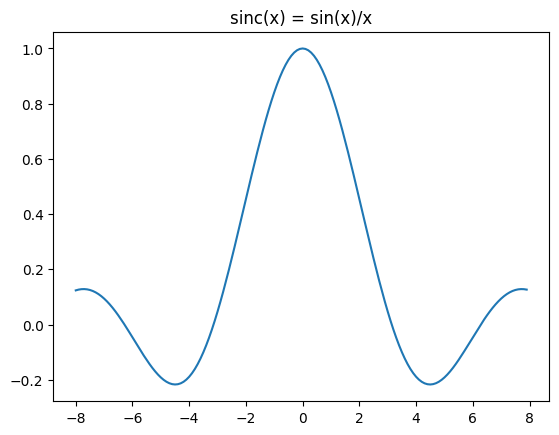

In [14]:
x_vals = np.arange(-8, 8, 0.1)
y_vals = sinc(x_vals)

plt.plot(x_vals, y_vals); plt.title("sinc(x) = sin(x)/x"); plt.show()

### (C)

In [15]:
MIN_STEP = 1e-4  # Stop optimization when step size is less than this threshold

for x_start in [3.0, -4.0, 0.5]:
  print(f'----------  Start = {x_start}  ----------')
  step_size = float('inf')
  x = np.array([x_start], dtype=np.float32)
  while step_size > MIN_STEP:
    x_t = newton_step(sinc, x)
    step_size = abs(x - x_t)
    print(f'x: {x} -> {x_t}')
    x = x_t
  print('\n')

----------  Start = 3.0  ----------
x: [3.] -> [4.885]
x: [4.885] -> [4.436]
x: [4.436] -> [4.493]
x: [4.493] -> [4.493]
x: [4.493] -> [4.493]


----------  Start = -4.0  ----------
x: [-4.] -> [-4.47]
x: [-4.47] -> [-4.493]
x: [-4.493] -> [-4.493]
x: [-4.493] -> [-4.493]


----------  Start = 0.5  ----------
x: [0.5] -> [-0.027]
x: [-0.027] -> [0.]
x: [0.] -> 0




Starting Newton's method at `3.0` or `-4.0` quickly converges on the nearest minima at `~4.493` and `~-4.493` respectively. However, when starting from `x=0.5` the method does not converge to a local minimum and instead heads to the maximum at `x=0` where `f(x)=sin(x)/x` is undefined.